In [ ]:
# adding project dir to python path

import sys
import os

path = os.path.dirname(os.getcwd())
path, module = path[:path.rindex("\\")], path[path.rindex("\\"):]

print(path, module)
if path not in sys.path:
    sys.path.insert(0, path)
    print("inserted")
else:
    print("already exists")


In [21]:
from globals import *
from trainingV3 import *
from load import *

BASE DIR NAME-C:\Users\Danish Amin\PycharmProjects\TF-NLP


2022-06-06 01:51:48,322 - model loaded successfully from models\model_L10_L6_H_S64.h5
2022-06-06 01:51:48,340 - data loaded successfully from data\tiny_nerf_data.npz
2022-06-06 01:51:55,949 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


tf.Tensor([0.41006702 0.29387632 0.15462245], shape=(3,), dtype=float32)


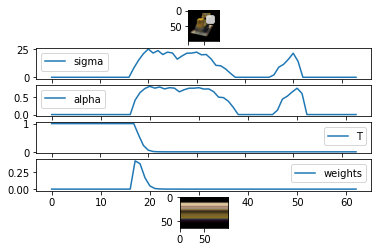

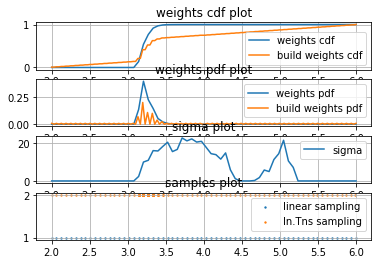

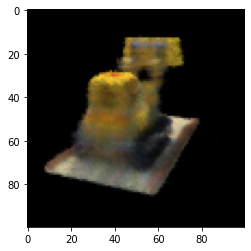

In [2]:
def test_inverse_transform_sampling():
    model = load_model("model_L10_L6_H_S64.h5")
    data = load_data()
    images = data['images']
    poses = data['poses']
    focal = tf.constant(data['focal'], dtype=tf.float32)
    near, far, samples = 2.0, 6.0, 64
    # images = np.arange(50*50*3).reshape((1,50,50,3))
    H, W = images[1].shape[:2]
    pose = poses[1]
    pose = np.array(
        [[-9.3054223e-01,  1.1707554e-01, - 3.4696460e-01, - 1.3986591e+00],
         [-3.6618456e-01, - 2.9751042e-01,  8.8170075e-01,  3.5542498e+00],
         [7.4505806e-09, 9.4751304e-01, 3.1971723e-01, 1.2888215e+00],
         [0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]
         ], dtype=np.float32
    )

    ro, rd = get_rays(H, W, focal, pose)
    theta, phi = get_angles(rd)
    # rgb, w, s = render_(model, ro, rd, theta, phi, near, far, samples=samples, level1=10, level2=6)
    # line = inverse_transform_sampling(w, s, near, far, H, W, samples)
    render(model, ro, rd, near, far, samples=samples, level1=10, level2=6)
    # plt.imshow(images[1])

test_inverse_transform_sampling()

(2, 2, 21)


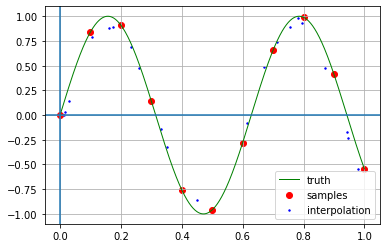

In [68]:
import tensorflow_probability as tfp



xa = np.broadcast_to(np.linspace(0, 1, 1001), (2, 2, 1001))
xi = np.sort(np.broadcast_to(np.random.rand(2, 2, 21), (2, 2, 21)), axis=-1)
x = np.broadcast_to(np.linspace(0, 1, 11), (2, 2, 11))

def f(x):
    return np.sin(10*x)

y = f(x)
ya = f(xa)


yi = tfp.math.batch_interp_regular_nd_grid (
    xi[..., None], xi[...,0, None], xi[...,-1, None], y, axis=-1
)


print(yi.shape)

plt.plot(xa[0,0], ya[0,0], linewidth=1, label='truth', color='green')
plt.scatter(x[0,0], y[0,0], label='samples', color='red')
plt.scatter(xi[0,0], yi[0,0], s=2, label="interpolation", color='blue')
plt.grid()
plt.axhline()
plt.axvline()
plt.legend()
plt.show()

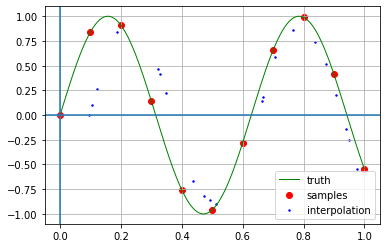

In [66]:
plt.plot(xa[0,0], ya[0,0], linewidth=1, label='truth', color='green')
plt.scatter(x[0,0], y[0,0], label='samples', color='red')
plt.scatter(xi[1,1], yi[1,1], s=2, label="interpolation", color='blue')
plt.grid()
plt.axhline()
plt.axvline()
plt.legend()
plt.show()

2022-06-07 22:57:57,503 - model loaded successfully from C:\Users\Danish Amin\PycharmProjects\TF-NLP\models\model_L10_L0_H_S32.h5
2022-06-07 22:57:57,503 - data loaded successfully from C:\Users\Danish Amin\PycharmProjects\TF-NLP\data\tiny_nerf_data.npz


100


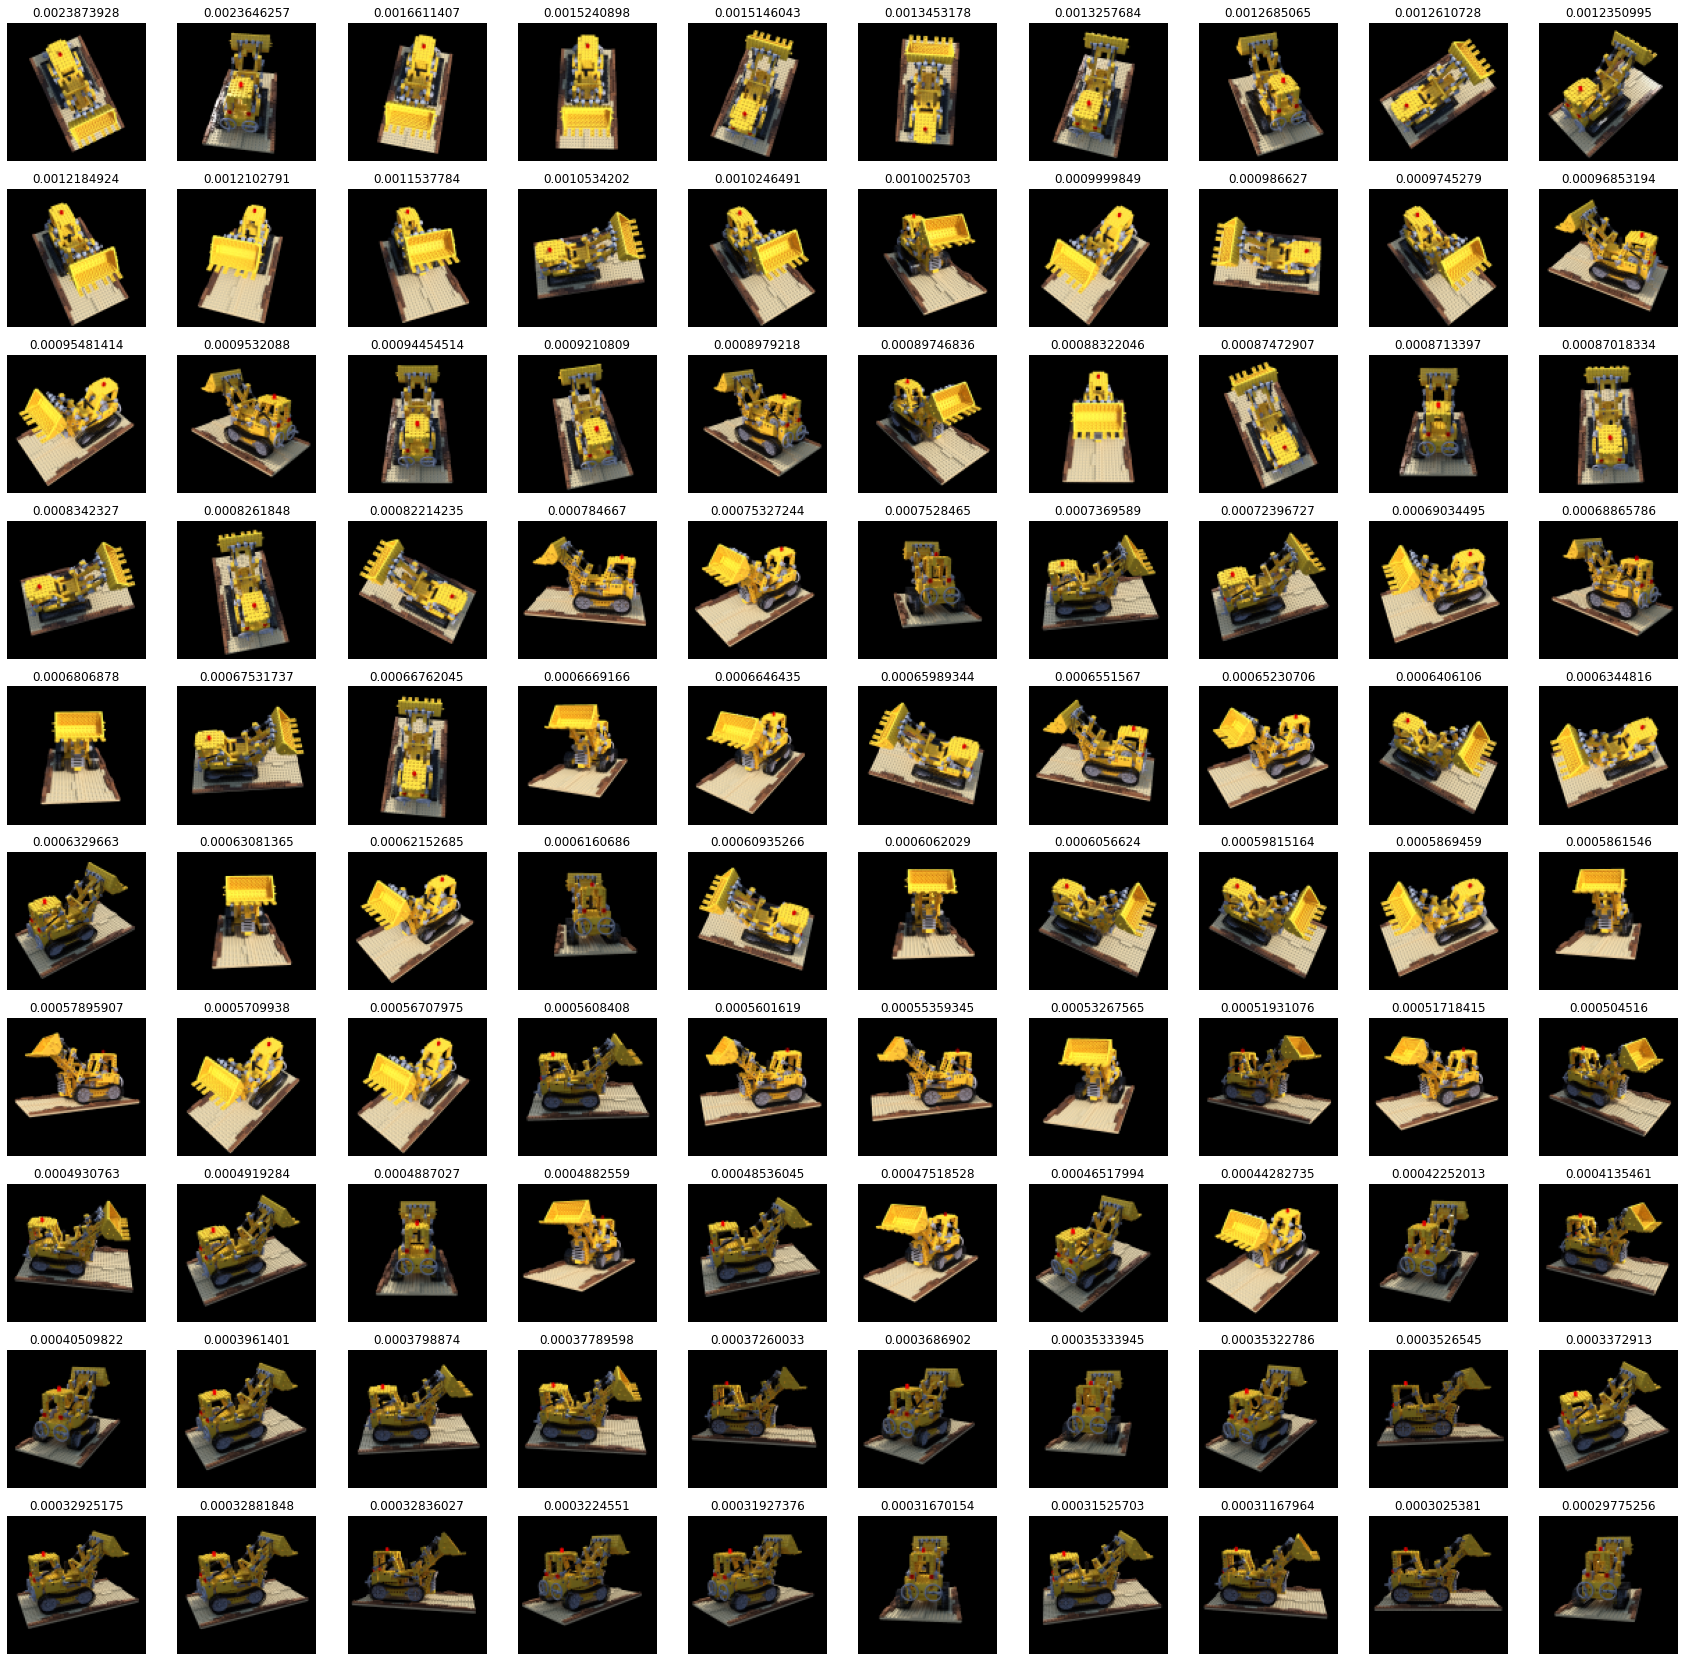

In [40]:
model = load_model("model_L10_L0_H_S32.h5")
data = load_data()
images = data['images']
poses = data['poses']
focal = tf.constant(data['focal'], dtype=tf.float32)
near, far, samples = 2.0, 6.0, 64
index = 101
H, W = images[index].shape[:2]
target = images[index]
pose = poses[index]
ro, rd = get_rays(H, W, focal, pose)
theta, phi = get_angles(rd)


r, c = 10, 10
data = sorted(
[(0.00066762045, 39), (0.00055359345, 17), (0.00053267565, 70), (0.00059815164, 93), (0.0013453178, 88), (0.00067531737, 14), (0.0006056624, 87), (0.0008979218, 74), (0.00087472907, 47), (0.00075327244, 73), (0.00065989344, 30), (0.0003224551, 60), (0.0012184924, 21), (0.00068865786, 4), (0.0003961401, 96), (0.0012610728, 56), (0.0006062029, 89), (0.0012685065, 50), (0.00031927376, 78), (0.0012350995, 66), (0.0003798874, 97), (0.00031167964, 8), (0.00095481414, 43), (0.0009210809, 11), (0.0006669166, 55), (0.00072396727, 58), (0.0013257684, 12), (0.00051931076, 10), (0.00032836027, 69), (0.0006406106, 44), (0.00042252013, 1), (0.000986627, 18), (0.0008342327, 62), (0.00035322786, 38), (0.0008261848, 57), (0.0003372913, 94), (0.0004930763, 16), (0.0004135461, 2), (0.0023873928, 7), (0.00040509822, 81), (0.000784667, 25), (0.0011537784, 71), (0.0015240898, 48), (0.00062152685, 6), (0.0010534202, 31), (0.00048536045, 54), (0.00032881848, 40), (0.0004887027, 0), (0.0006806878, 76), (0.00096853194, 22), (0.0006551567, 59), (0.00057895907, 95), (0.00029775256, 64), (0.0005869459, 99), (0.0004882559, 13), (0.00037789598, 90), (0.00046517994, 34), (0.00031525703, 9), (0.00031670154, 41), (0.00060935266, 77), (0.0009999849, 86), (0.00089746836, 24), (0.000504516, 52), (0.0016611407, 91), (0.00037260033, 53), (0.0003025381, 32), (0.0015146043, 82), (0.0004919284, 23), (0.0009532088, 15), (0.0007369589, 5), (0.0006646435, 20), (0.0008713397, 67), (0.0003686902, 51), (0.0010025703, 29), (0.00087018334, 79), (0.0010246491, 92), (0.0006329663, 45), (0.0009745279, 3), (0.00069034495, 80), (0.0005608408, 83), (0.00035333945, 75), (0.00056707975, 36), (0.0006160686, 42), (0.00051718415, 19), (0.00032925175, 35), (0.00047518528, 63), (0.0007528465, 26), (0.00063081365, 98), (0.00082214235, 37), (0.0005601619, 72), (0.0006344816, 49), (0.00044282735, 28), (0.0023646257, 27), (0.0003526545, 85), (0.0005861546, 65), (0.00094454514, 61), (0.0012102791, 84), (0.00065230706, 68), (0.0005709938, 33), (0.00088322046, 46)]    , reverse=True)
plt.figure(figsize=[30, 30*r//c])

print(len(data))
for i, v in enumerate(data, 1):
    snr, index = v
    image = images[index]
    plt.subplot(r, c, i)
    plt.imshow(image)
    plt.title(str(snr))
    plt.axis('off')
    



# rgb, w = render_(model, ro, rd, theta, phi, near, far, samples=samples, level1=10, level2=0)
# rgbf, _ = render_fine(model, ro, rd, theta, phi, near, far, samples=2*samples, level1=10, level2=0, pdf=w)
# rgb = render(model, ro, rd, near, far, samples=samples, level1=10, level2=0)

2022-06-07 16:40:20,326 - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


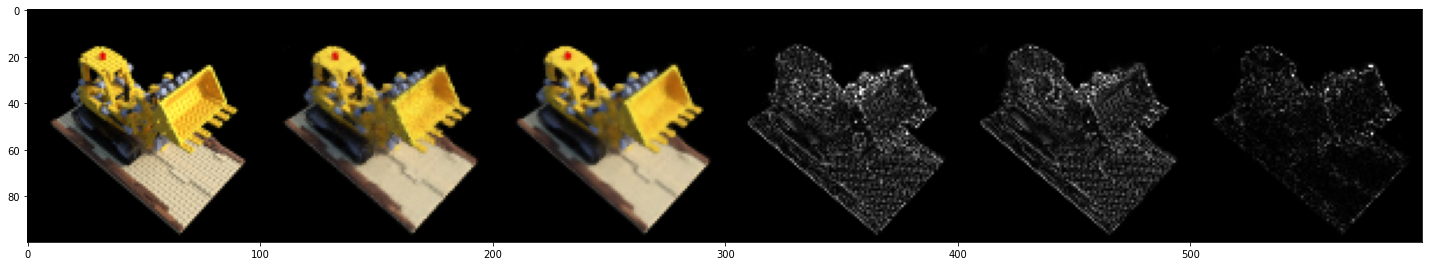

In [3]:
diffc = 1*tf.concat([tf.reduce_sum(tf.abs(rgb - target), axis=-1)[..., None]]*3, axis=-1)
difff = 1*tf.concat([tf.reduce_sum(tf.abs(rgbf - target), axis=-1)[..., None]]*3, axis=-1)
difcf = 1*tf.concat([tf.reduce_sum(tf.abs(rgb - rgbf), axis=-1)[..., None]]*3, axis=-1)
plt.figure(figsize=[25,15])
plt.imshow(np.hstack([target, rgb, rgbf, diffc, difff, difcf]))
plt.show()

# original, coarse, fine, original minus coarse, original minus fine, coarse minus fine

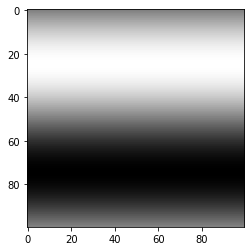

In [96]:
x = np.linspace(0, 1, 100)
f = 2*np.pi*1
y = np.sin(f*x)
yy = np.concatenate([y[..., None]]*100, axis=-1)
yy = yy[..., None]
xx = np.rot90(yy)
# yy += xx
plt.imshow(yy, cmap='gray')

(100, 100) (100, 100) (100, 100)


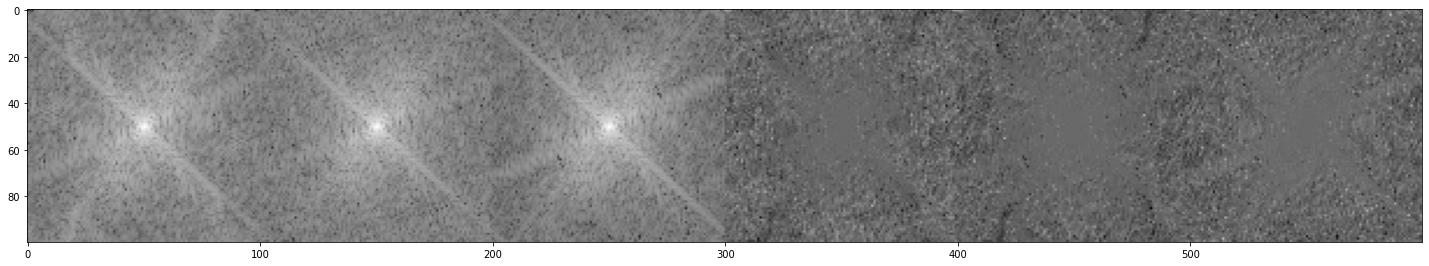

In [97]:
index = 0

g = target[...,index]
it = np.fft.fftshift(np.fft.fft2(g))
ft = np.log(1e-10 + np.abs(it))

h = rgb[...,index]
ic = np.fft.fftshift(np.fft.fft2(h))
fc = np.log(1e-10 + np.abs(ic))

i = rgbf[...,index]
if_ = np.fft.fftshift(np.fft.fft2(i))
ff = np.log(1e-10 + np.abs(if_))

yyg = yy
iy =  np.fft.fftshift(np.fft.fft2(yyg))
fy = np.log(1e-10 + np.abs(iy))

# g = target[...,index]
# f = np.fft.fftshift(np.fft.fft2(g))
# ft = np.log(1e-10 + np.abs(f))

print(ft.shape, fc.shape, ff.shape)

img = np.hstack([ft, fc, ff, fc-ft, ff-ft, ff-fc])

plt.figure(figsize=[25,15])
plt.imshow(img, cmap='gray')
# plt.imshow(ft, cmap='gray')
# plt.imshow(ft, cmap='gray')

plt.show()

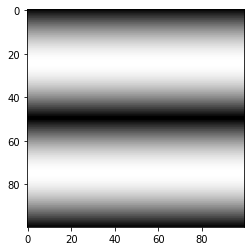

In [99]:
plt.imshow(1*np.abs((np.fft.ifft2(iy))), cmap='gray')

In [20]:
import random

value = list(range(10))
a = random.sample(value, k=len(value))
print(a)

[1, 9, 5, 7, 2, 4, 3, 8, 0, 6]
